按时间序列（日、月）对积极的情感的中位数/平均数 进行曲线的绘制

           publish_time  baidu_confidence  baidu_negative  baidu_positive  \
0      2022-09-01 00:00          0.998606        0.000627        0.999373   
1      2022-09-01 00:00          0.967423        0.014660        0.985340   
2      2022-09-01 00:01          0.999436        0.000254        0.999746   
3      2022-09-01 00:02          0.934098        0.029656        0.970344   
4      2022-09-01 00:02          0.044687        0.570109        0.429891   
...                 ...               ...             ...             ...   
53941  2022-09-30 23:59          0.988325        0.005254        0.994746   
53942  2022-09-30 23:59          0.996947        0.001374        0.998626   
53943  2022-09-30 23:59          0.937021        0.028341        0.971659   
53944  2022-09-30 23:59          0.997151        0.001282        0.998718   
53945  2022-09-30 23:59          0.950472        0.022288        0.977712   

       baidu_sentiment  
0                  2.0  
1                  2.0  


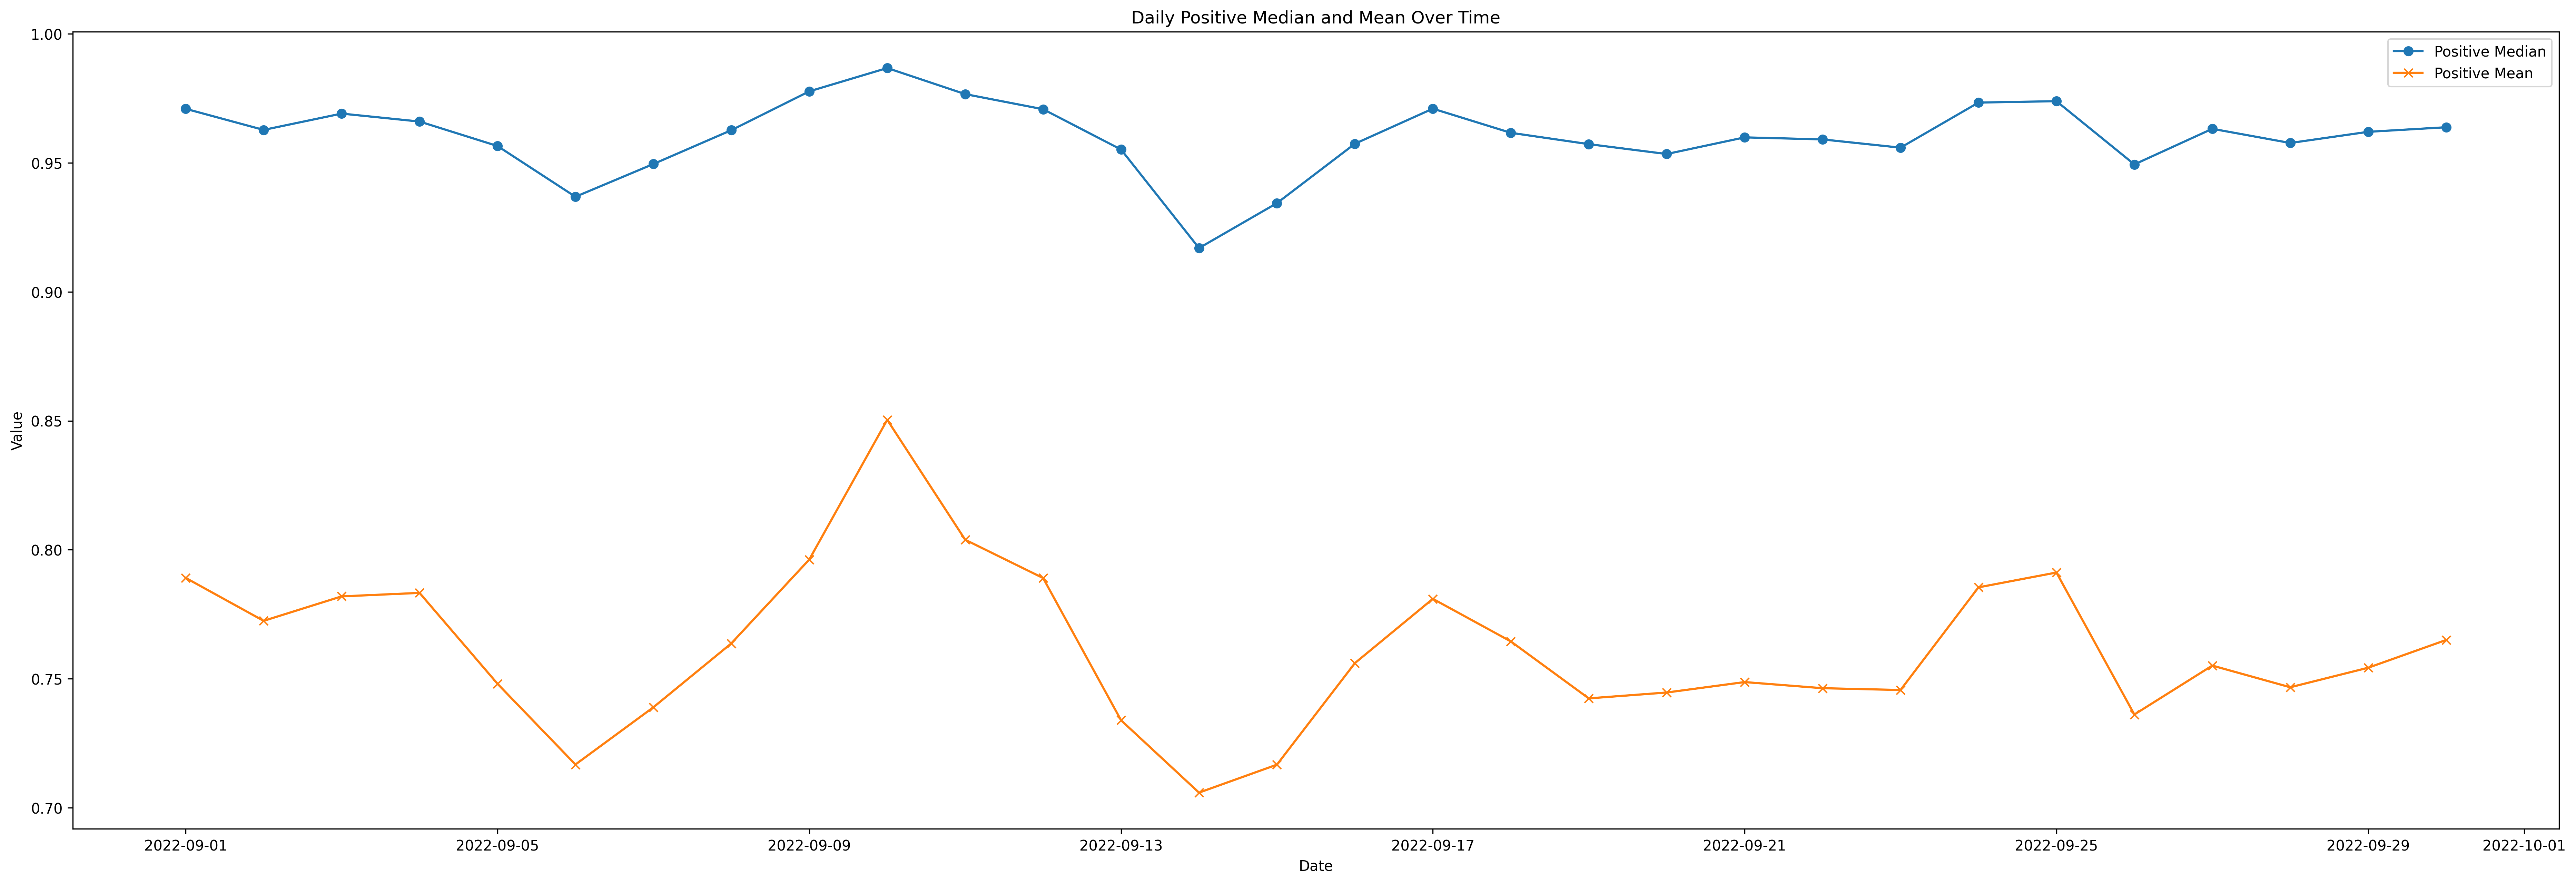

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

daily=pd.read_csv(r'data\上海2019_2023年按月分类文件_情绪值\20220901_20221001 65098 条_Baidu.csv')
daily=daily[['publish_time','baidu_confidence','baidu_negative','baidu_positive','baidu_sentiment']]
print(daily)

# 将publish_time转换为日期格式
daily["publish_time"] = pd.to_datetime(daily["publish_time"])

# 按日分组，计算每日positive值的中位数和平均数
daily_stats = (
    daily.groupby(daily["publish_time"].dt.date)
    .agg({"baidu_positive": ["median", "mean"]})
    .reset_index()
)

# 重命名列以便于后续处理
daily_stats.columns = ["date", "positive_median", "positive_mean"]

# 将日期列转换为datetime格式
daily_stats["date"] = pd.to_datetime(daily_stats["date"])

# 绘制图表
plt.figure(figsize=(31, 10),dpi=300)

# 绘制中位数曲线
plt.plot(
    daily_stats["date"],
    daily_stats["positive_median"],
    label="Positive Median",
    marker="o",
)

# 绘制平均数曲线
plt.plot(
    daily_stats["date"], daily_stats["positive_mean"], label="Positive Mean", marker="x"
)

# 设置图表标题和标签
plt.title("Daily Positive Median and Mean Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

# 显示图表
plt.show()

C:\Users\name\AppData\Local\Temp\ipykernel_17968\209669283.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time']=pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_17968\209669283.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time']=pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_17968\209669283.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future vers

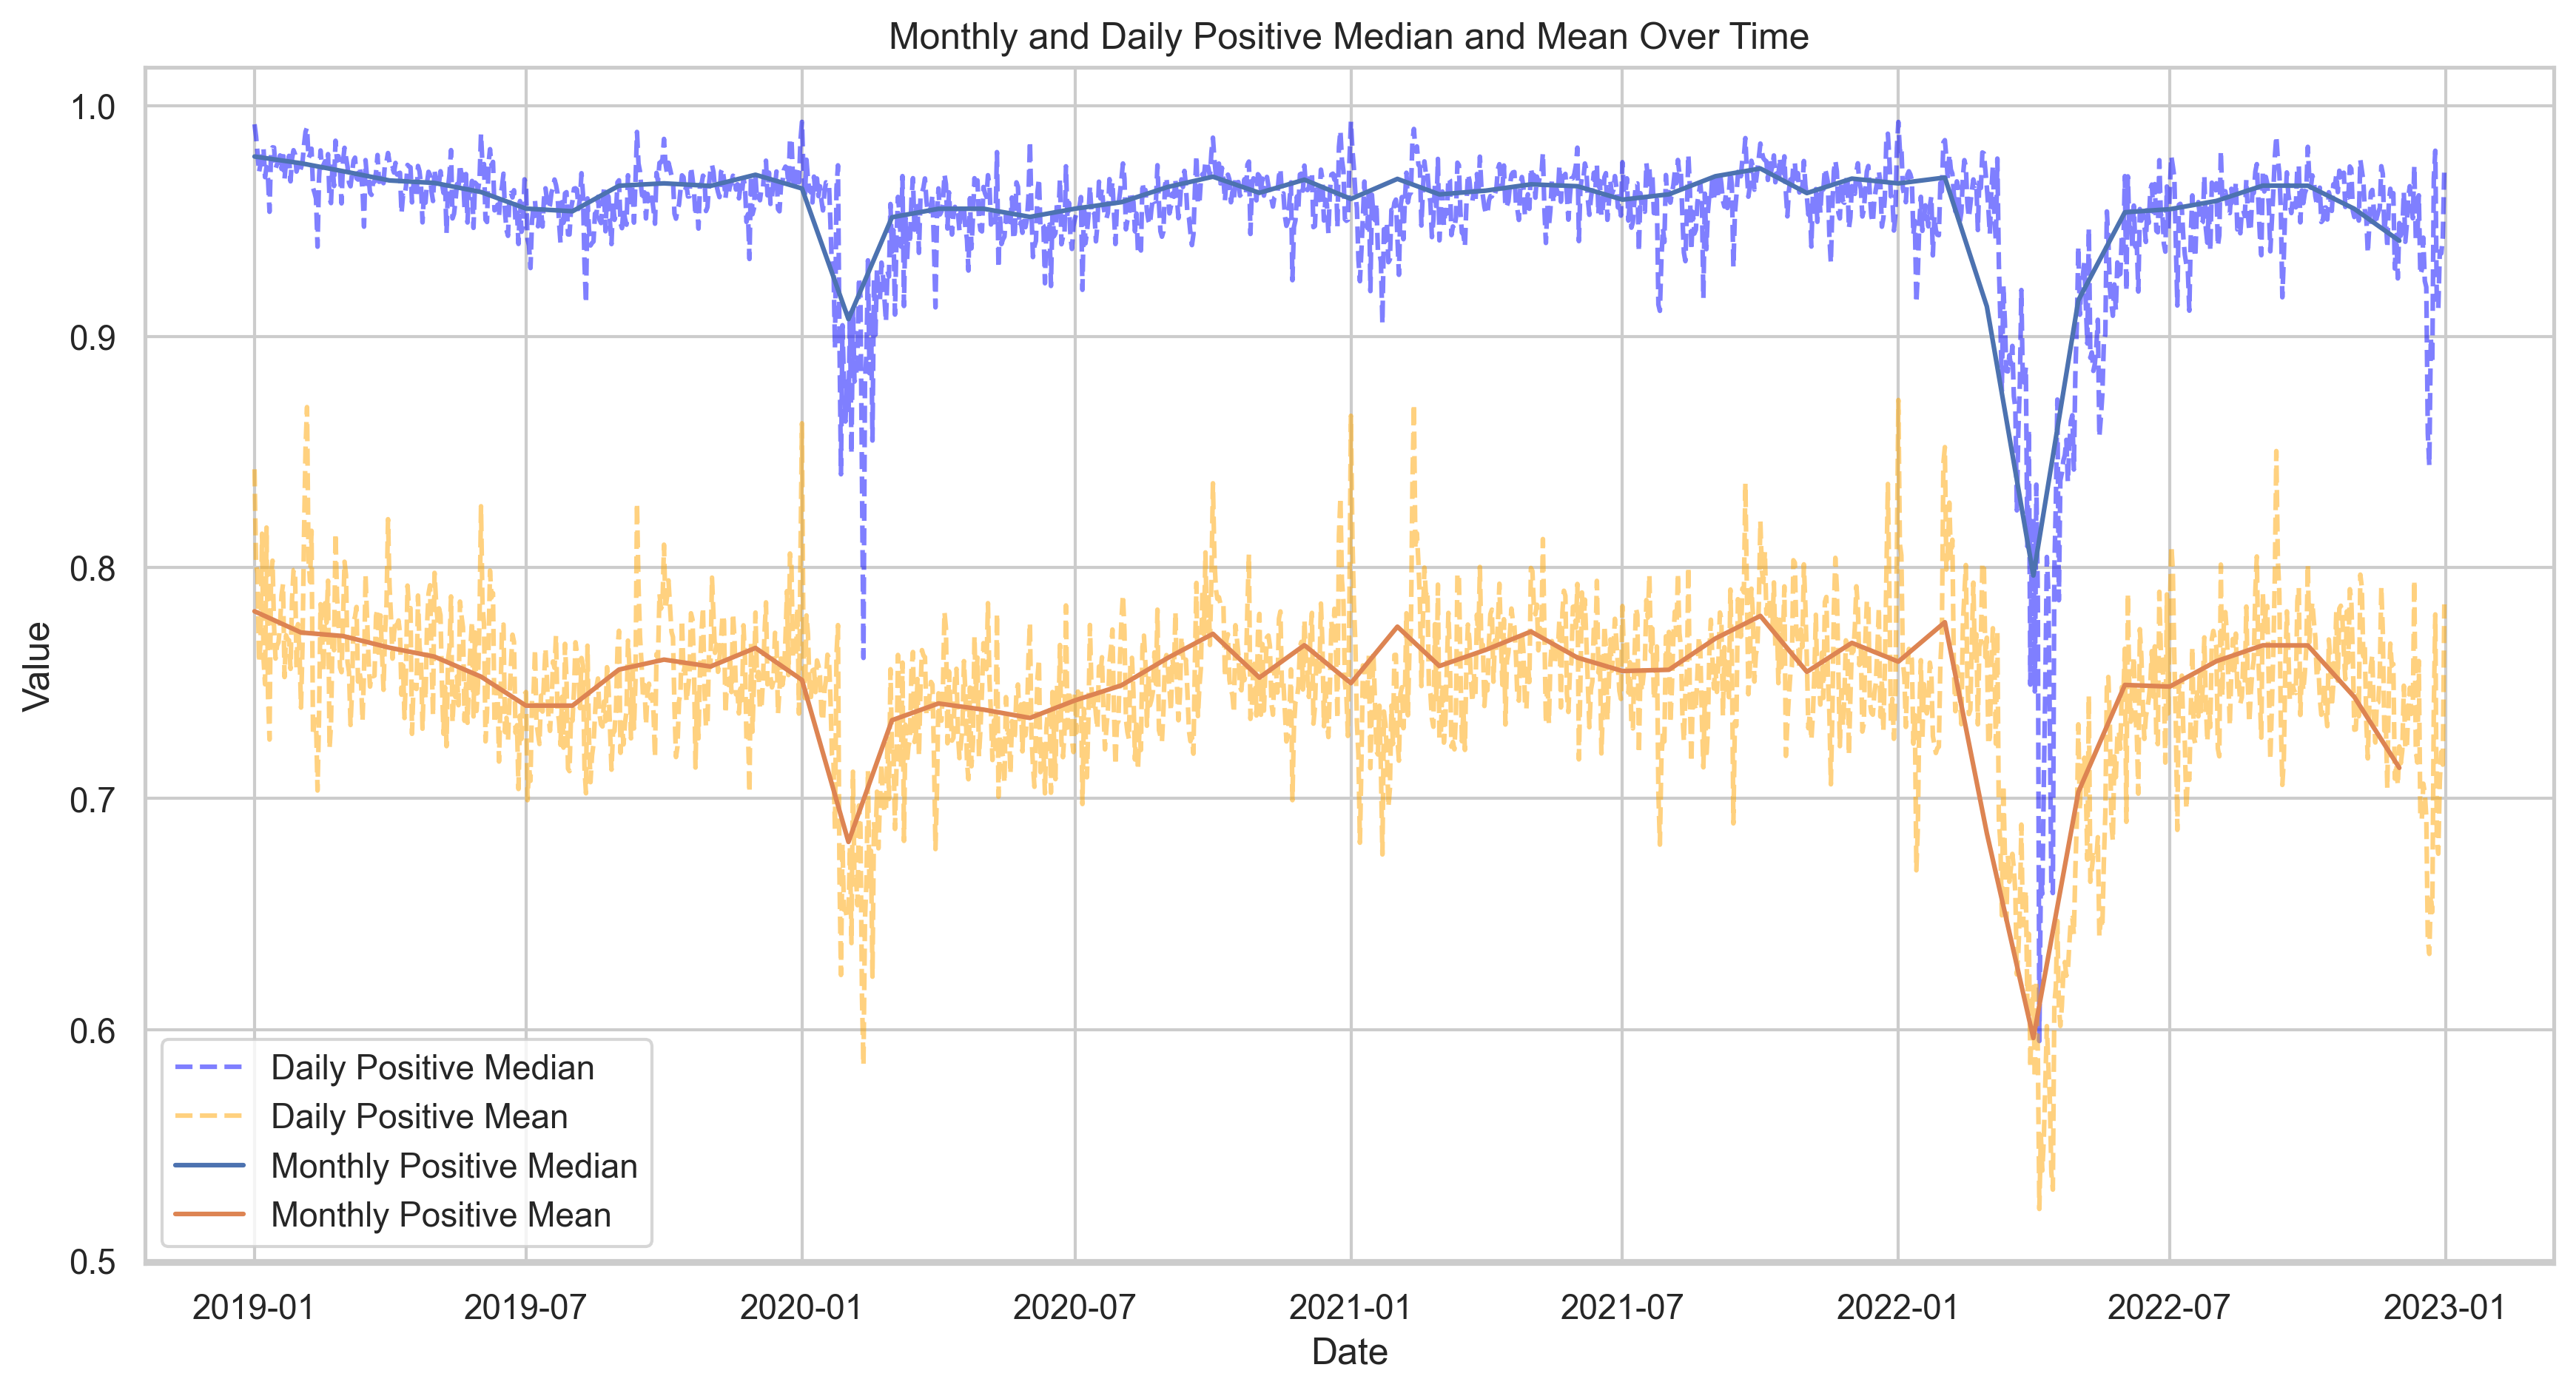

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 指定文件夹路径
folder_path = r'data/上海2019_2023年按月分类文件_情绪值'

# 存储所有数据
all_data = []

# 使用glob模块遍历文件夹中的所有csv文件
for file_path in glob.glob(os.path.join(folder_path, '*.csv')):
    try:
        data = pd.read_csv(file_path)
        data=data[['publish_time','baidu_confidence','baidu_negative','baidu_positive','baidu_sentiment']]
        data['publish_time']=pd.to_datetime(data['publish_time'], infer_datetime_format=True)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# 合并所有数据
df = pd.concat(all_data, ignore_index=True)

# 按日分组，计算每日positive值的中位数和平均数
daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
daily_stats.columns = ['date', 'positive_median_daily', 'positive_mean_daily']

# 将日期列转换为datetime格式
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

# 按月分组，计算每月positive值的中位数和平均数
monthly_stats = df.groupby(df['publish_time'].dt.to_period('M').dt.to_timestamp()).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
monthly_stats.columns = ['date', 'positive_median_monthly', 'positive_mean_monthly']

# 将日期列转换为datetime格式
monthly_stats['date'] = pd.to_datetime(monthly_stats['date'])

# 设置seaborn风格
sns.set(style="whitegrid")

# 绘制图表
plt.figure(figsize=(14, 7), dpi=300)

# 绘制按日计算的中位数曲线（虚线）
sns.lineplot(x='date', y='positive_median_daily', data=daily_stats, linestyle='--', color='blue', label='Daily Positive Median',alpha=0.5)

# 绘制按日计算的平均数曲线（虚线）
sns.lineplot(x='date', y='positive_mean_daily', data=daily_stats, linestyle='--', color='orange', label='Daily Positive Mean',alpha=0.5)

# 绘制按月计算的中位数曲线（实线）
# sns.lineplot(x='date', y='positive_median_monthly', data=monthly_stats, label='Monthly Positive Median', marker='o')
sns.lineplot(x='date', y='positive_median_monthly', data=monthly_stats, label='Monthly Positive Median')

# 绘制按月计算的平均数曲线（实线）
# sns.lineplot(x='date', y='positive_mean_monthly', data=monthly_stats, label='Monthly Positive Mean', marker='x')
sns.lineplot(x='date', y='positive_mean_monthly', data=monthly_stats, label='Monthly Positive Mean')



# 设置图表标题和标签
plt.title('Monthly and Daily Positive Median and Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# 显示图表
plt.show()

daily_stats.to_csv('out/figure/Positive_daily_stats.csv', index=False,encoding='utf-8-sig')
monthly_stats.to_csv('out/figure/Positive_monthly_stats.csv', index=False,encoding='utf-8-sig')


C:\Users\name\AppData\Local\Temp\ipykernel_17968\2265680182.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time']=pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_17968\2265680182.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time']=pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_17968\2265680182.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future v

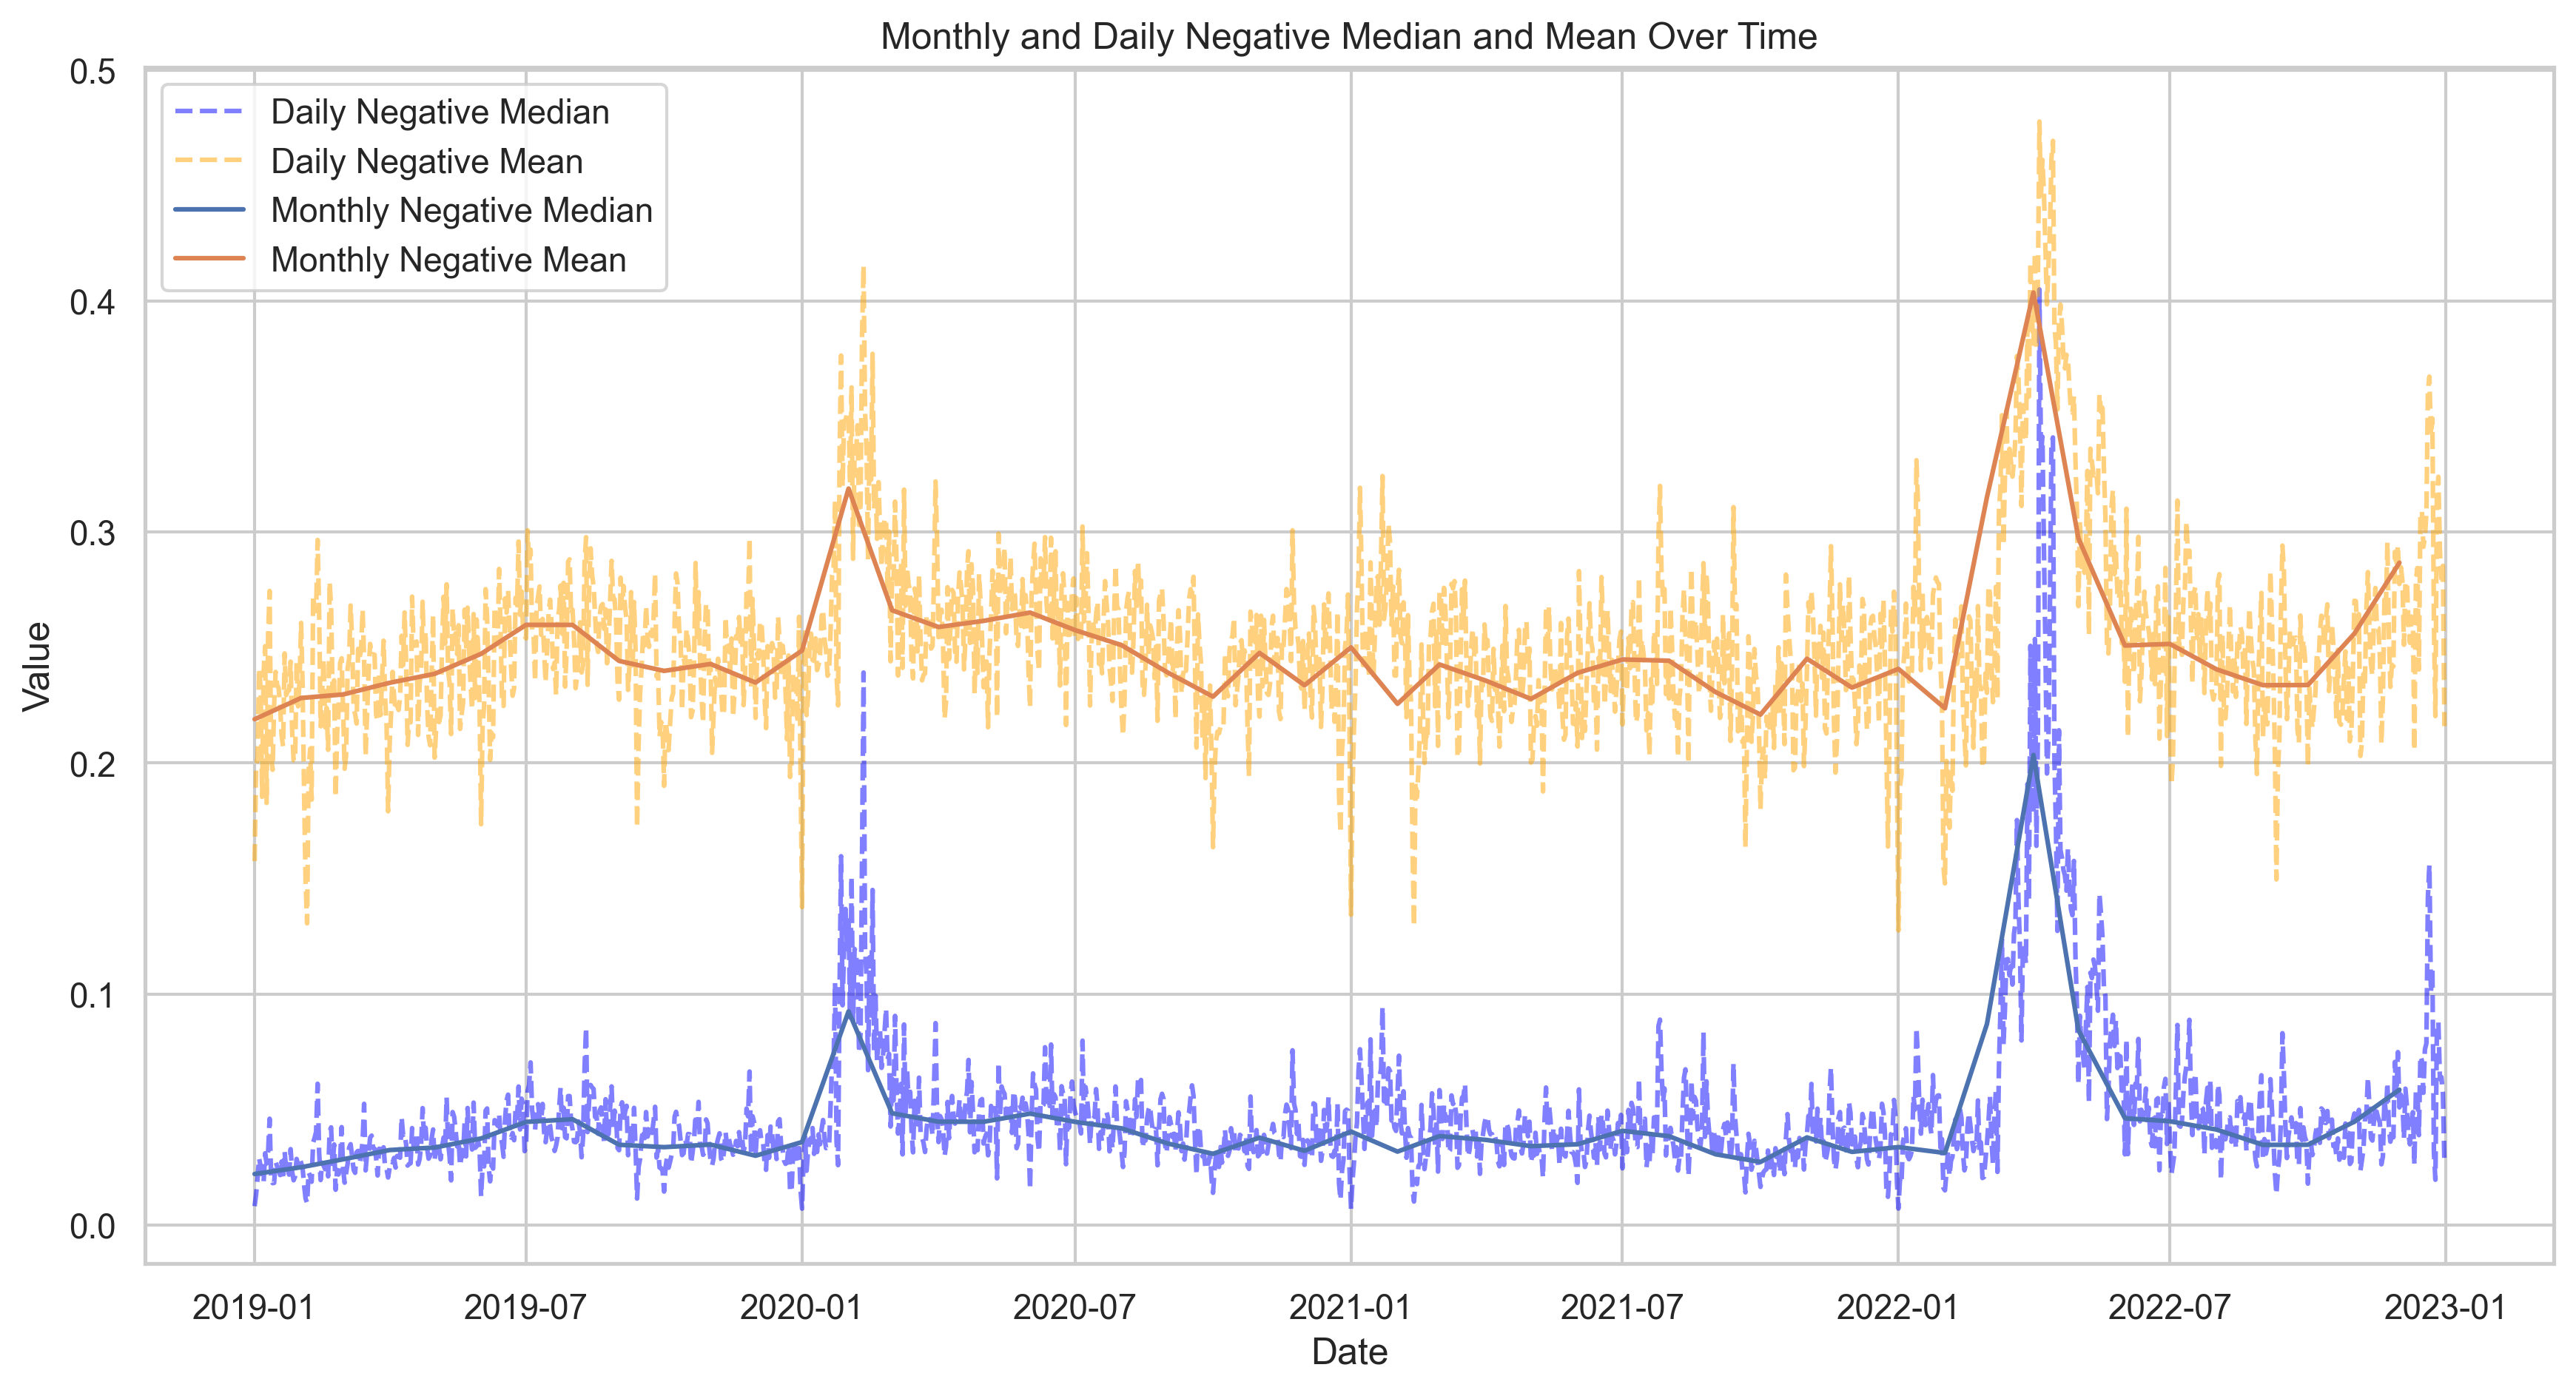

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 指定文件夹路径
folder_path = r'data/上海2019_2023年按月分类文件_情绪值'

# 存储所有数据
all_data = []

# 使用glob模块遍历文件夹中的所有csv文件
for file_path in glob.glob(os.path.join(folder_path, '*.csv')):
    try:
        data = pd.read_csv(file_path)
        data=data[['publish_time','baidu_confidence','baidu_negative','baidu_positive','baidu_sentiment']]
        data['publish_time']=pd.to_datetime(data['publish_time'], infer_datetime_format=True)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# 合并所有数据
df = pd.concat(all_data, ignore_index=True)

# 按日分组，计算每日negaive值的中位数和平均数
daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_negative': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
daily_stats.columns = ['date', 'negative_median_daily', 'negative_mean_daily']

# 将日期列转换为datetime格式
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

# 按月分组，计算每月negative值的中位数和平均数
monthly_stats = df.groupby(df['publish_time'].dt.to_period('M').dt.to_timestamp()).agg({
    'baidu_negative': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
monthly_stats.columns = ['date', 'negative_median_monthly', 'negative_mean_monthly']

# 将日期列转换为datetime格式
monthly_stats['date'] = pd.to_datetime(monthly_stats['date'])

# 设置seaborn风格
sns.set(style="whitegrid")

# 绘制图表
plt.figure(figsize=(14, 7), dpi=300)

# 绘制按日计算的中位数曲线（虚线）
sns.lineplot(x='date', y='negative_median_daily', data=daily_stats, linestyle='--', color='blue', label='Daily Negative Median',alpha=0.5)

# 绘制按日计算的平均数曲线（虚线）
sns.lineplot(x='date', y='negative_mean_daily', data=daily_stats, linestyle='--', color='orange', label='Daily Negative Mean',alpha=0.5)

# 绘制按月计算的中位数曲线（实线）
sns.lineplot(x='date', y='negative_median_monthly', data=monthly_stats, label='Monthly Negative Median')

# 绘制按月计算的平均数曲线（实线）
sns.lineplot(x='date', y='negative_mean_monthly', data=monthly_stats, label='Monthly Negative Mean')



# 设置图表标题和标签
plt.title('Monthly and Daily Negative Median and Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# 显示图表
plt.show()

daily_stats.to_csv('out/figure/Negative_daily_stats.csv', index=False,encoding='utf-8-sig')
monthly_stats.to_csv('out/figure/Negative_monthly_stats.csv', index=False,encoding='utf-8-sig')

一起

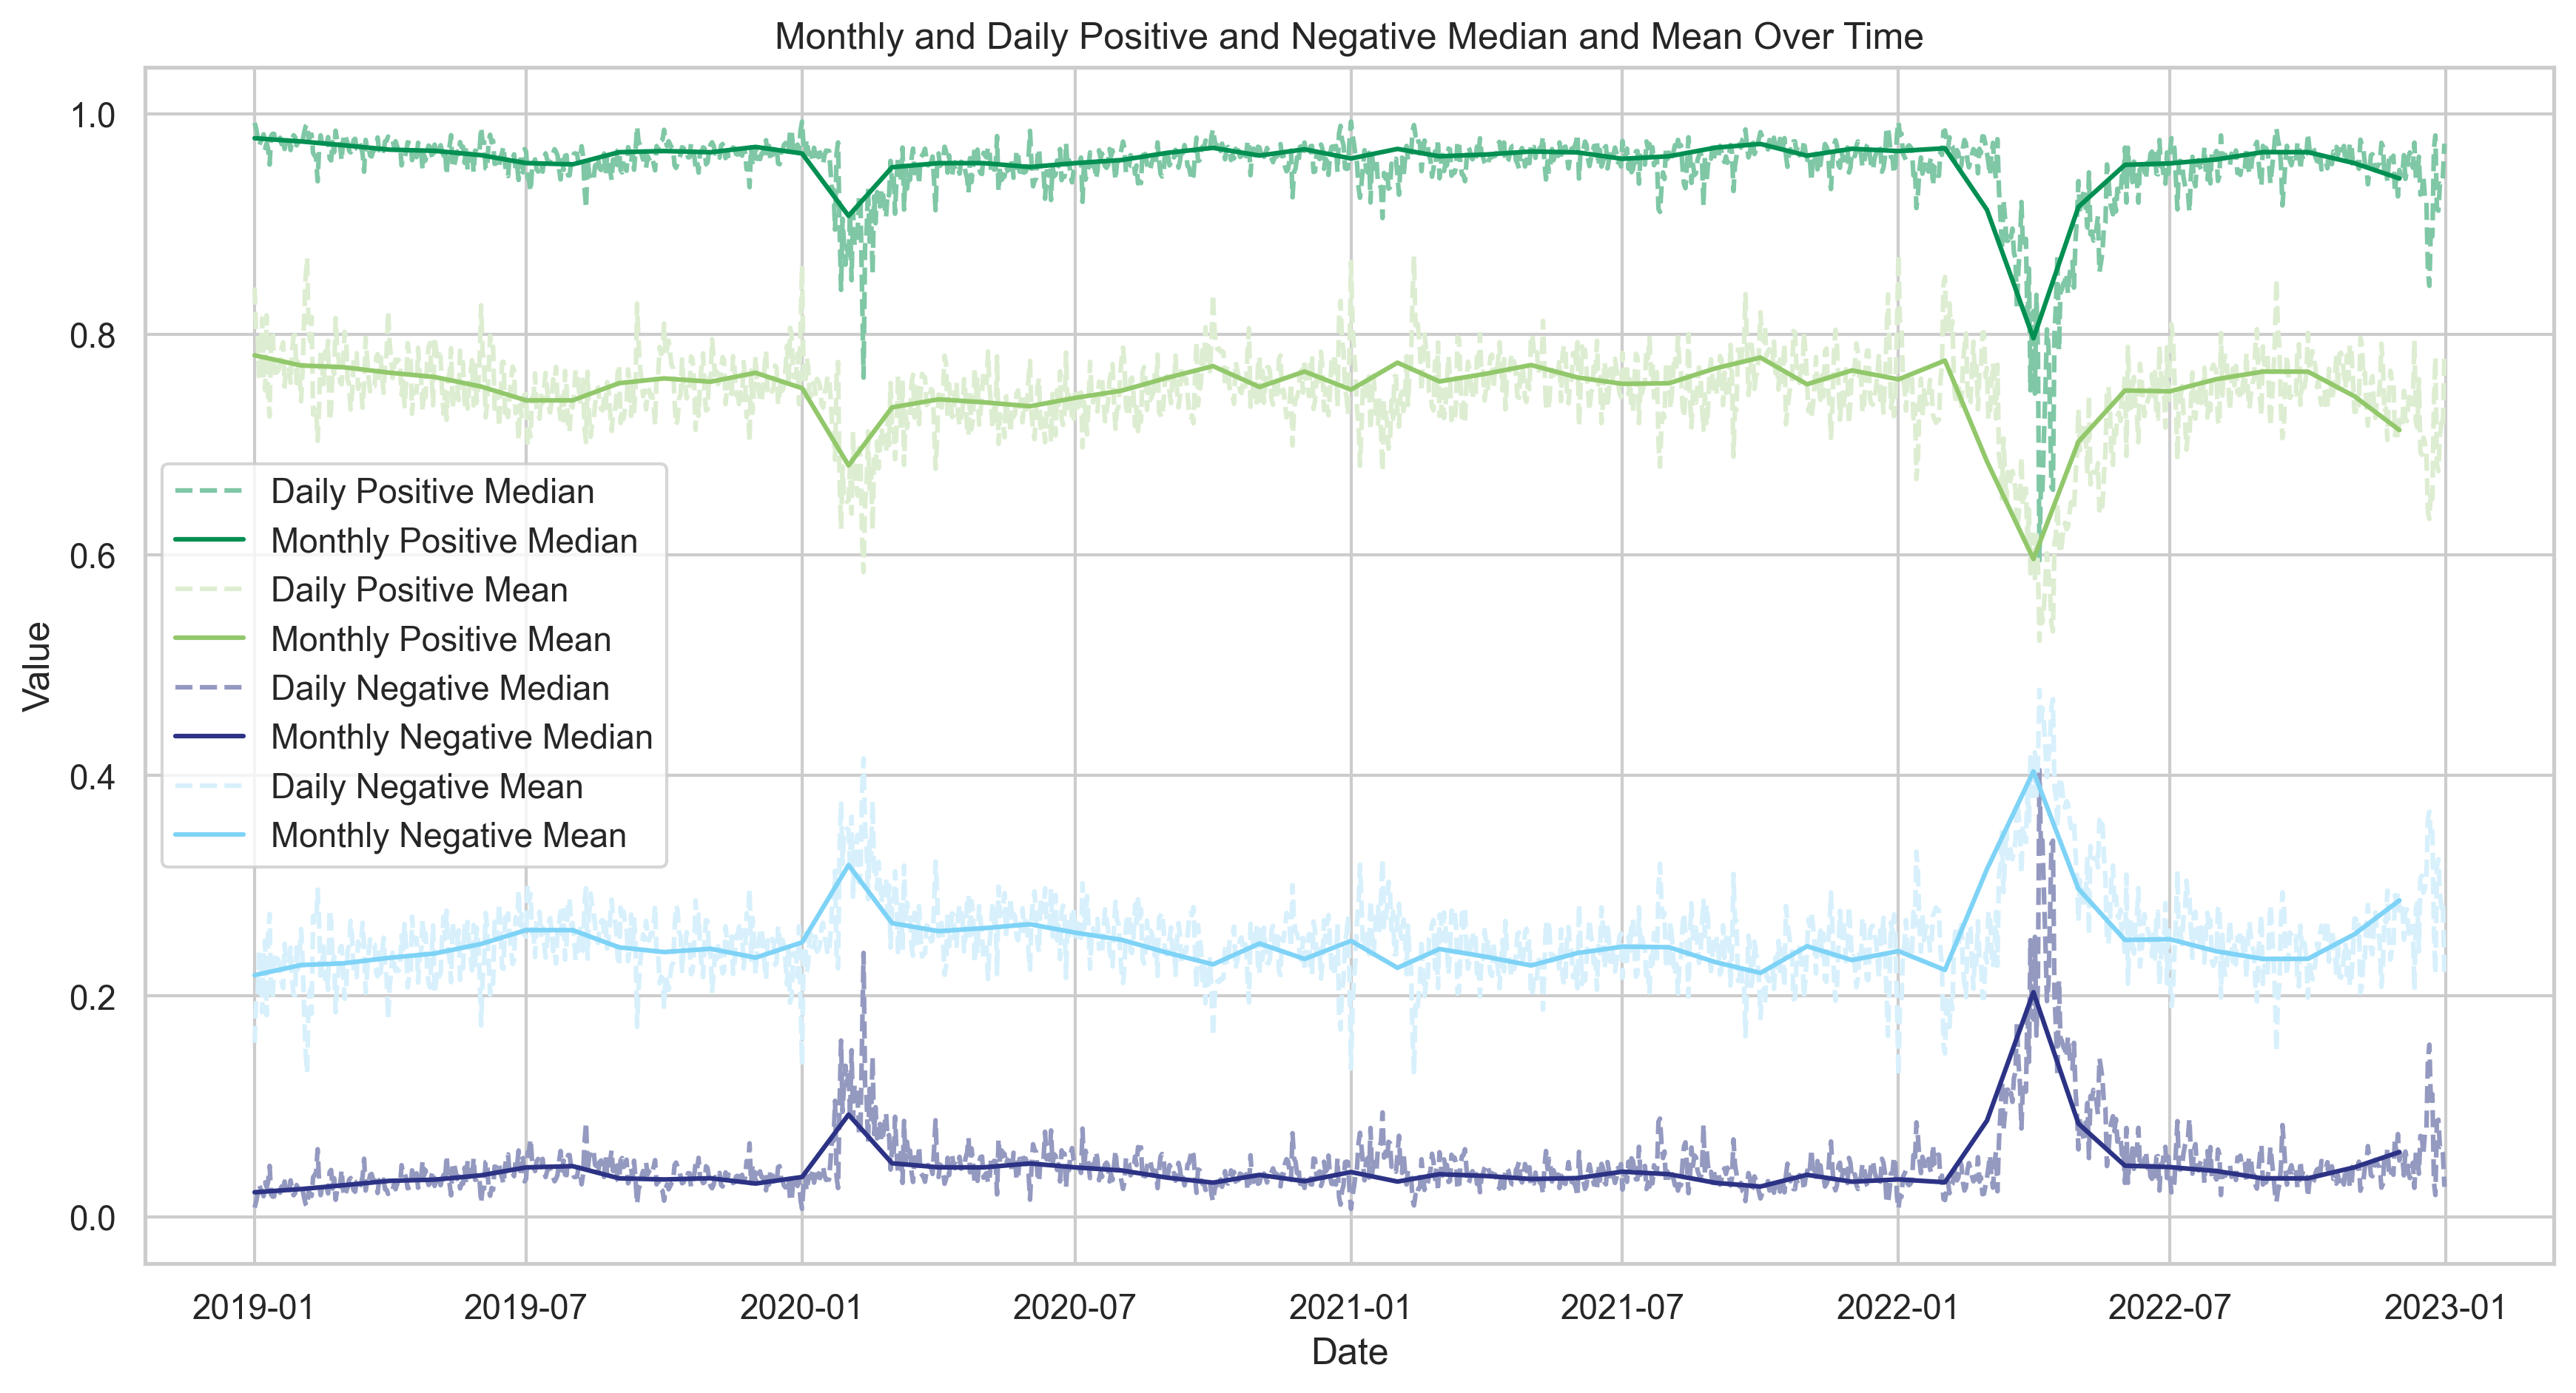

In [ ]:
# 按日分组，计算每日positive值的中位数和平均数
daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
daily_stats.columns = ['date', 'positive_median_daily', 'positive_mean_daily']

# 将日期列转换为datetime格式
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

# 按月分组，计算每月positive值的中位数和平均数
monthly_stats = df.groupby(df['publish_time'].dt.to_period('M').dt.to_timestamp()).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
monthly_stats.columns = ['date', 'positive_median_monthly', 'positive_mean_monthly']

# 将日期列转换为datetime格式
monthly_stats['date'] = pd.to_datetime(monthly_stats['date'])

# 设置seaborn风格
sns.set(style="whitegrid")

# 绘制图表
plt.figure(figsize=(14, 7), dpi=300)

# 绘制按日计算的中位数曲线（虚线）
sns.lineplot(x='date', y='positive_median_daily', data=daily_stats, linestyle='--', color='#7fc7a5', label='Daily Positive Median')
# 绘制按月计算的中位数曲线（实线）
# sns.lineplot(x='date', y='positive_median_monthly', data=monthly_stats, label='Monthly Positive Median', marker='o')
sns.lineplot(x='date', y='positive_median_monthly', data=monthly_stats, color='#018f52',label='Monthly Positive Median')

# 绘制按日计算的平均数曲线（虚线）
sns.lineplot(x='date', y='positive_mean_daily', data=daily_stats, linestyle='--', color='#ddedd1', label='Daily Positive Mean')
# 绘制按月计算的平均数曲线（实线）
# sns.lineplot(x='date', y='positive_mean_monthly', data=monthly_stats, label='Monthly Positive Mean', marker='x')
sns.lineplot(x='date', y='positive_mean_monthly', data=monthly_stats, color='#92c86b',label='Monthly Positive Mean')



# 按日分组，计算每日negaive值的中位数和平均数
daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_negative': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
daily_stats.columns = ['date', 'negative_median_daily', 'negative_mean_daily']

# 将日期列转换为datetime格式
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

# 按月分组，计算每月negative值的中位数和平均数
monthly_stats = df.groupby(df['publish_time'].dt.to_period('M').dt.to_timestamp()).agg({
    'baidu_negative': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
monthly_stats.columns = ['date', 'negative_median_monthly', 'negative_mean_monthly']

# 将日期列转换为datetime格式
monthly_stats['date'] = pd.to_datetime(monthly_stats['date'])

# 设置seaborn风格
sns.set(style="whitegrid")


# 绘制按日计算的中位数曲线（虚线）
sns.lineplot(x='date', y='negative_median_daily', data=daily_stats, linestyle='--', color='#9499c0', label='Daily Negative Median')
# 绘制按月计算的中位数曲线（实线）
sns.lineplot(x='date', y='negative_median_monthly', data=monthly_stats,color='#2c3385', label='Monthly Negative Median')

# 绘制按日计算的平均数曲线（虚线）
sns.lineplot(x='date', y='negative_mean_daily', data=daily_stats, linestyle='--', color='#d7f0fc', label='Daily Negative Mean')
# 绘制按月计算的平均数曲线（实线）
sns.lineplot(x='date', y='negative_mean_monthly', data=monthly_stats,color='#7ed3f6', label='Monthly Negative Mean')

# 设置图表标题和标签
plt.title('Monthly and Daily Positive and Negative Median and Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# 显示图表
plt.show()
# #7fc7a5,#018f52
# #ddedd1,'#92c86b
# #9499c0,#2c3385
# #d7f0fc,#7ed3f6

monthly改15天

C:\Users\name\AppData\Local\Temp\ipykernel_4180\530103380.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_4180\530103380.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_4180\530103380.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future ver

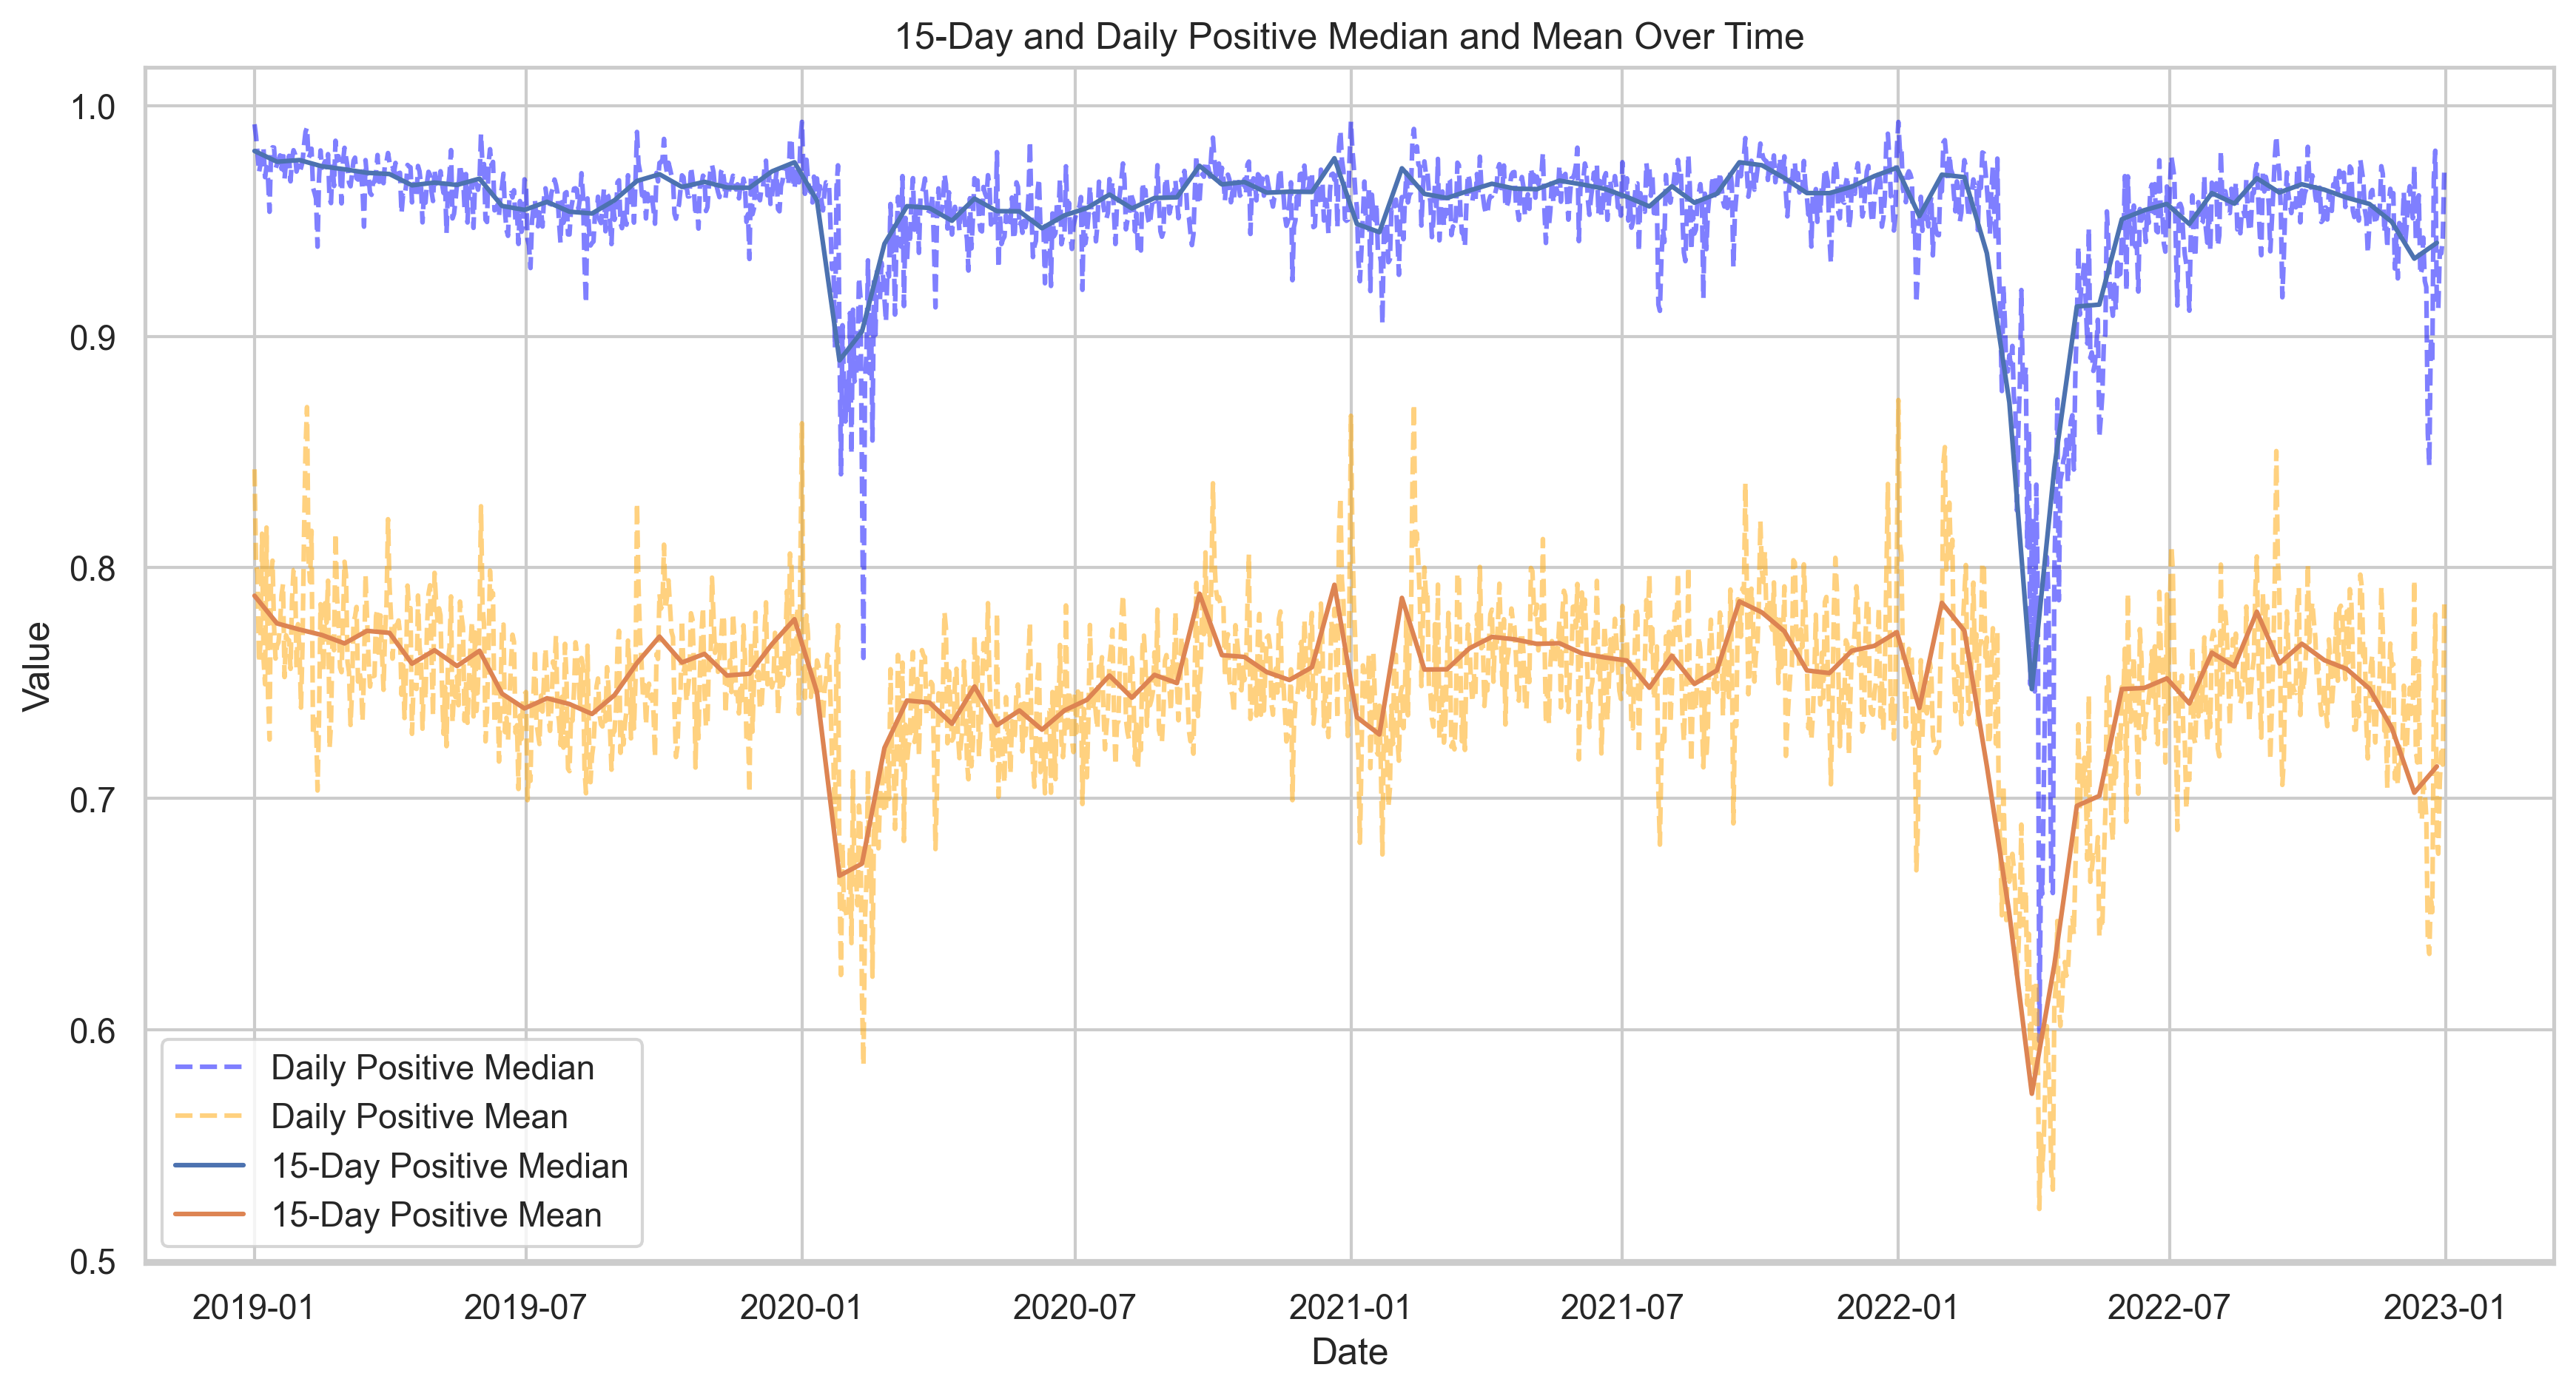

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 使用nature的style
# plt.style.use('nature')

# 指定文件夹路径
folder_path = r'data/上海2019_2023年按月分类文件_情绪值'

# 存储所有数据
all_data = []

# 使用glob模块遍历文件夹中的所有csv文件
for file_path in glob.glob(os.path.join(folder_path, '*.csv')):
    try:
        data = pd.read_csv(file_path)
        data = data[['publish_time', 'baidu_confidence', 'baidu_negative', 'baidu_positive', 'baidu_sentiment']]
        data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# 合并所有数据
df = pd.concat(all_data, ignore_index=True)

# 按日分组，计算每日positive值的中位数和平均数
daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
daily_stats.columns = ['date', 'positive_median_daily', 'positive_mean_daily']

# 将日期列转换为datetime格式
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

# 按15天分组，计算每15天positive值的中位数和平均数
fifteen_day_stats = df.groupby(pd.Grouper(key='publish_time', freq='15D')).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
fifteen_day_stats.columns = ['date', 'positive_median_fifteen_day', 'positive_mean_fifteen_day']

# 将日期列转换为datetime格式
fifteen_day_stats['date'] = pd.to_datetime(fifteen_day_stats['date'])

# 设置seaborn风格
sns.set(style="whitegrid")

# 绘制图表
plt.figure(figsize=(14, 7), dpi=300)

# 绘制按日计算的中位数曲线（虚线）
sns.lineplot(x='date', y='positive_median_daily', data=daily_stats, linestyle='--', color='blue', label='Daily Positive Median')

# 绘制按日计算的平均数曲线（虚线）
sns.lineplot(x='date', y='positive_mean_daily', data=daily_stats, linestyle='--', color='orange', label='Daily Positive Mean')

# 绘制按15天计算的中位数曲线（实线）
sns.lineplot(x='date', y='positive_median_fifteen_day', data=fifteen_day_stats, label='15-Day Positive Median')

# 绘制按15天计算的平均数曲线（实线）
sns.lineplot(x='date', y='positive_mean_fifteen_day', data=fifteen_day_stats, label='15-Day Positive Mean')

# 设置图表标题和标签
plt.title('15-Day and Daily Positive Median and Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# 显示图表
plt.show()

# daily_stats.to_csv('out/figure/Positive_daily_stats.csv', index=False, encoding='utf-8-sig')
fifteen_day_stats.to_csv('out/figure/Positive_fifteen_day_stats.csv', index=False, encoding='utf-8-sig')
